<h1>6  &nbsp;Estudo comparativo - Soluções numéricas e analítica</h1>

<h2>6.1 &nbsp; Erro absoluto e percentual</h2>

&nbsp; Esta seção tem como objetivo comparar a solução analítica e a aproximação numérica com a população estimada para 2021 pelo IBGE.

&nbsp; Os resultados obtidos pela solução analítica, pelo método de Euler, Euler modificado e RK4:

<center><b>Aproximação populacional para Rio Grande por método</b></center>

| Método | Número de habitantes |
| --- | --- |
| LSODA | 208447.55940518 |
| Euler | 208446.62006659 |
| Euler modificado | 208446.56882837 |
|RK4 |208446.56882864 |
|RK45|  208447.55725928|

<center>Fonte: O autor</center>

&nbsp; Importando bibliotecas:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

&nbsp; Declarando o nome dos métodos, aproximações e a população estimada pelo IBGE

In [2]:
metodos = ['Analítico','LSODA','Euler','Euler modificado','RK4','RK45']

solucoes = [208447.5573077047,
            208447.55940518,
            208446.62006659,
            208446.56882837,
            208446.56882864, 
            208447.55725928]

index = [0,1,2,3,4]

solucao_IBGE = 212881

dados = [[0, 0, 0]]

&nbsp; A seguir, obtemos o erro das soluções obtidas com relação a população fornecida pelo IBGE.

In [3]:
for i in index:
    erro_hab = solucao_IBGE - solucoes[i]
    erro_perc = (erro_hab/solucao_IBGE)*100
    #Adicionando linhas à matriz (tabela)
    dados = np.vstack([dados,[metodos[i],round(erro_hab),str(round(erro_perc,2))+'%']])
   

Finalmente, exibimos os dados armazenados:

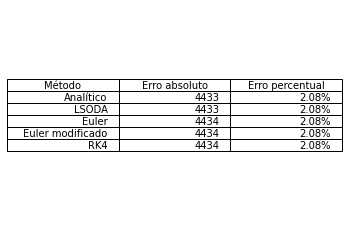

In [4]:
#remove a primeira linha da matriz
dados = np.delete(dados, 0, 0)

#Exibindo tabela
fig, ax =plt.subplots(1,1)
column_labels=['Método', 'Erro absoluto', 'Erro percentual']
ax.axis('tight')
ax.axis('off')
ax.table(cellText=dados,colLabels=column_labels,loc='center')

plt.show()

<h2>6.2  &nbsp; O maior passo de derivação para produzir uma aproximação aceitável</h2>

&nbsp; Vimos que a solução analítica possui uma aproximação aceitável, com erro de 1.47% em relação ao IBGE. &nbsp; Neste tópico, vamos verificar se é possível reduzir o passo de derivação de modo a diminuir o erro dos métodos numéricos estudados neste repositório.
<br><br>
Adicionando o diretório que contém os arquivos python:

In [5]:
import sys 
sys.path.insert(0, '../python')

&nbsp; Importanto o módulo <i>menor_passo</i> em <i><b>Modelos-Populacionais/python/</b></i> 

In [6]:
from menor_passo import menor_passo

<h3>Método de Euler</h3>

&nbsp; Declarando variáveis:


In [7]:
#Condição inicial
P0 = 186488

#tempo inicial
ti = 0

#tempo final
tf = 21

#passo inicial
h = 0.001

#decrescimo
decrescimo = 0.0001 #adicionar mais um zero à esquerda faz o código demorar

#inicio de tabela de dados
dados = [[0, 0, 0, 0]]

&nbsp; Contruindo algoritmo para minimizar o erro através da redução do passo de derivação.

In [8]:
%%time

dados = menor_passo(ti,tf,h,decrescimo,P0,solucao_IBGE,dados,'Euler','verhulst')

- Iteração. Passo atual (h):  0.0009
- Iteração. Passo atual (h):  0.0007999999999999999
- Iteração. Passo atual (h):  0.0006999999999999999
- Iteração. Passo atual (h):  0.0005999999999999998
- Iteração. Passo atual (h):  0.0004999999999999998
- Iteração. Passo atual (h):  0.0003999999999999998
- Iteração. Passo atual (h):  0.0002999999999999998
- Iteração. Passo atual (h):  0.00019999999999999982
- Iteração. Passo atual (h):  9.999999999999982e-05
- Iteração. Passo atual (h):  -1.8973538018496328e-19
passo negativo: -1.8973538018496328e-19
Erro absoluto (hab):  4433.437568228022
Erro absoluto arredondado (hab):  4433.0
Erro percentual arredondado 2.08%
Erro percentual 2.08258960086998%
Passo atual:  9.999999999999982e-05
CPU times: total: 1min 11s
Wall time: 1min 13s


<h3>Método de Euler modificado</h3>

In [9]:
%%time

dados = menor_passo(ti,tf,h,decrescimo,P0,solucao_IBGE,dados,'Euler Modificado','verhulst')

- Iteração. Passo atual (h):  0.0009
- Iteração. Passo atual (h):  0.0007999999999999999
- Iteração. Passo atual (h):  0.0006999999999999999
- Iteração. Passo atual (h):  0.0005999999999999998
- Iteração. Passo atual (h):  0.0004999999999999998
- Iteração. Passo atual (h):  0.0003999999999999998
- Iteração. Passo atual (h):  0.0002999999999999998
- Iteração. Passo atual (h):  0.00019999999999999982
- Iteração. Passo atual (h):  9.999999999999982e-05
- Iteração. Passo atual (h):  -1.8973538018496328e-19
passo negativo: -1.8973538018496328e-19
Erro absoluto (hab):  4433.442692292912
Erro absoluto arredondado (hab):  4433.0
Erro percentual arredondado 2.08%
Erro percentual 2.0825920078790086%
Passo atual:  9.999999999999982e-05
CPU times: total: 1min 9s
Wall time: 1min 10s


<h3>Método de Runge-Kutta de 4º ordem</h3>

In [10]:
%%time

dados = menor_passo(ti,tf,h,decrescimo,P0,solucao_IBGE,dados,'RK4','verhulst')

- Iteração. Passo atual (h):  0.0009
- Iteração. Passo atual (h):  0.0007999999999999999
- Iteração. Passo atual (h):  0.0006999999999999999
- Iteração. Passo atual (h):  0.0005999999999999998
- Iteração. Passo atual (h):  0.0004999999999999998
- Iteração. Passo atual (h):  0.0003999999999999998
- Iteração. Passo atual (h):  0.0002999999999999998
- Iteração. Passo atual (h):  0.00019999999999999982
- Iteração. Passo atual (h):  9.999999999999982e-05
- Iteração. Passo atual (h):  -1.8973538018496328e-19
passo negativo: -1.8973538018496328e-19
Erro absoluto (hab):  4433.442692290177
Erro absoluto arredondado (hab):  4433.0
Erro percentual arredondado 2.08%
Erro percentual 2.082592007877724%
Passo atual:  9.999999999999982e-05
CPU times: total: 1min 10s
Wall time: 1min 10s


<h3>Método LSODA</h3>

In [11]:
%%time

dados = menor_passo(ti,tf,h,decrescimo,P0,solucao_IBGE,dados,'LSODA','verhulst')

- Iteração. Passo atual (h):  0.0009
- Iteração. Passo atual (h):  0.0007999999999999999
- Iteração. Passo atual (h):  0.0006999999999999999
- Iteração. Passo atual (h):  0.0005999999999999998
- Iteração. Passo atual (h):  0.0004999999999999998
- Iteração. Passo atual (h):  0.0003999999999999998
- Iteração. Passo atual (h):  0.0002999999999999998
- Iteração. Passo atual (h):  0.00019999999999999982
- Iteração. Passo atual (h):  9.999999999999982e-05
- Iteração. Passo atual (h):  -1.8973538018496328e-19
passo negativo: -1.8973538018496328e-19
Erro absoluto (hab):  4433.443672377733
Erro absoluto arredondado (hab):  4433.0
Erro percentual arredondado 2.08%
Erro percentual 2.0825924682699406%
Passo atual:  9.999999999999982e-05
CPU times: total: 62.5 ms
Wall time: 68 ms


<h3> Método RK45 </h3>

In [12]:
%%time

dados = menor_passo(ti,tf,h,decrescimo,P0,solucao_IBGE,dados,'RK45','verhulst')

- Iteração. Passo atual (h):  0.0009
- Iteração. Passo atual (h):  0.0007999999999999999
- Iteração. Passo atual (h):  0.0006999999999999999
- Iteração. Passo atual (h):  0.0005999999999999998
- Iteração. Passo atual (h):  0.0004999999999999998
- Iteração. Passo atual (h):  0.0003999999999999998
- Iteração. Passo atual (h):  0.0002999999999999998
- Iteração. Passo atual (h):  0.00019999999999999982
- Iteração. Passo atual (h):  9.999999999999982e-05
- Iteração. Passo atual (h):  -1.8973538018496328e-19
passo negativo: -1.8973538018496328e-19
Erro absoluto (hab):  4433.442740722006
Erro absoluto arredondado (hab):  4433.0
Erro percentual arredondado 2.08%
Erro percentual 2.082592030628382%
Passo atual:  9.999999999999982e-05
CPU times: total: 125 ms
Wall time: 130 ms


<h3>Resultados</h3>
&nbsp; Exibindo os dados obtidos pelas células anteriores:

[['Euler' '9.999999999999982e-05' '4433' '2.08%']
 ['Euler Modificado' '9.999999999999982e-05' '4433' '2.08%']
 ['RK4' '9.999999999999982e-05' '4433' '2.08%']
 ['LSODA' '9.999999999999982e-05' '4433' '2.08%']
 ['RK45' '9.999999999999982e-05' '4433' '2.08%']]


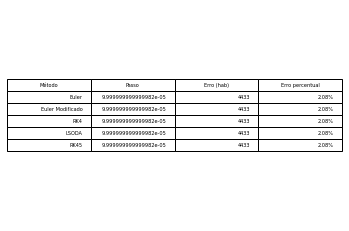

In [13]:
#remove a primeira linha da matriz
dados = np.delete(dados, 0, 0)

#Exibindo tabela
fig, ax =plt.subplots(1,1)
column_labels=['Método', 'Passo','Erro (hab)', 'Erro percentual']
ax.axis('tight')
ax.axis('off')
ax.table(cellText=dados,colLabels=column_labels,loc='center')
print(dados)
plt.show()

&nbsp; Observa-se que a medida que diminuimos o passo de derivação as aproximações obtidas através dos métodos de Euler, Euler modificado e Runge-Kutta de 4º ordem e LSODA permanecem próximas do passo inicial (0.001). &nbsp; Já o método Runge-Kutta 45 obteve um erro de 1.47% em relação à estimativa do IBGE. &nbsp; Cabe salientar que o método RK45 obteve o mesmo erro pencentual pertencente a solução analítica.